In [435]:
#Import Libraries
import glob
from keras.models import Sequential, load_model
import numpy as np
import pandas as pd
import keras as k
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

from scipy.stats import mode

In [436]:
df = pd.read_csv("kid.csv")
df.head()

,id,age,bloodpressure,specificgravity,albumin,sugar,redbloodcells,puscell,puscellclumps,bacteria,...,packedcellvolume,whitebloodcellcount,redbloodcellcount,hypertension,diabetesmellitus,coronaryarterydisease,appetite,pedaledema,anemia,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,1.0,0.0,0.0,...,44.0,7800,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1
1,1,7.0,50.0,1.020,4.0,0.0,NaN,1.0,0.0,0.0,...,38.0,6000,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1
2,2,62.0,80.0,1.010,2.0,3.0,1.0,1.0,0.0,0.0,...,31.0,7500,NaN,0.0,1.0,0.0,0.0,0.0,1.0,1
3,3,48.0,70.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,...,32.0,6700,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1
4,4,51.0,80.0,1.010,2.0,0.0,1.0,1.0,0.0,0.0,...,35.0,7300,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1


In [437]:
df.tail(10)

,id,age,bloodpressure,specificgravity,albumin,sugar,redbloodcells,puscell,puscellclumps,bacteria,...,packedcellvolume,whitebloodcellcount,redbloodcellcount,hypertension,diabetesmellitus,coronaryarterydisease,appetite,pedaledema,anemia,classification
390,390,52.0,80.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,...,52.0,6300,5.3,0.0,0.0,0.0,1.0,0.0,0.0,0
391,391,36.0,80.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,...,44.0,5800,6.3,0.0,0.0,0.0,1.0,0.0,0.0,0
392,392,57.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,...,46.0,6600,5.5,0.0,0.0,0.0,1.0,0.0,0.0,0
393,393,43.0,60.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,...,54.0,7400,5.4,0.0,0.0,0.0,1.0,0.0,0.0,0
394,394,50.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,...,45.0,9500,4.6,0.0,0.0,0.0,1.0,0.0,0.0,0
395,395,55.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,...,47.0,6700,4.9,0.0,0.0,0.0,1.0,0.0,0.0,0
396,396,42.0,70.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,...,54.0,7800,6.2,0.0,0.0,0.0,1.0,0.0,0.0,0
397,397,12.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,...,49.0,6600,5.4,0.0,0.0,0.0,1.0,0.0,0.0,0
398,398,17.0,60.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,...,51.0,7200,5.9,0.0,0.0,0.0,1.0,0.0,0.0,0
399,399,58.0,80.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,...,53.0,6800,6.1,0.0,0.0,0.0,1.0,0.0,0.0,0


In [438]:
df.isnull().sum()

id                         0
age                        9
bloodpressure             12
specificgravity           47
albumin                   46
sugar                     49
redbloodcells            152
puscell                   65
puscellclumps              4
bacteria                   4
bloodglucoserandom        44
bloodurea                 19
serumcreatinine           17
sodium                    87
potassium                 88
haemoglobin               52
packedcellvolume          71
whitebloodcellcount      105
redbloodcellcount        130
hypertension               2
diabetesmellitus           2
coronaryarterydisease      2
appetite                   1
pedaledema                 1
anemia                     1
classification             0
dtype: int64

In [439]:
df=df.bfill(axis ='rows') 

In [440]:
df.isnull().sum()

id                       0
age                      0
bloodpressure            0
specificgravity          0
albumin                  0
sugar                    0
redbloodcells            0
puscell                  0
puscellclumps            0
bacteria                 0
bloodglucoserandom       0
bloodurea                0
serumcreatinine          0
sodium                   0
potassium                0
haemoglobin              0
packedcellvolume         0
whitebloodcellcount      0
redbloodcellcount        0
hypertension             0
diabetesmellitus         0
coronaryarterydisease    0
appetite                 0
pedaledema               0
anemia                   0
classification           0
dtype: int64

In [441]:
df.head()

,id,age,bloodpressure,specificgravity,albumin,sugar,redbloodcells,puscell,puscellclumps,bacteria,...,packedcellvolume,whitebloodcellcount,redbloodcellcount,hypertension,diabetesmellitus,coronaryarterydisease,appetite,pedaledema,anemia,classification
0,0,48.0,80.0,1.020,1.0,0.0,1.0,1.0,0.0,0.0,...,44.0,7800,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1
1,1,7.0,50.0,1.020,4.0,0.0,1.0,1.0,0.0,0.0,...,38.0,6000,3.9,0.0,0.0,0.0,1.0,0.0,0.0,1
2,2,62.0,80.0,1.010,2.0,3.0,1.0,1.0,0.0,0.0,...,31.0,7500,3.9,0.0,1.0,0.0,0.0,0.0,1.0,1
3,3,48.0,70.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,...,32.0,6700,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1
4,4,51.0,80.0,1.010,2.0,0.0,1.0,1.0,0.0,0.0,...,35.0,7300,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1


In [442]:
df.describe()

,id,age,bloodpressure,specificgravity,albumin,sugar,redbloodcells,puscell,puscellclumps,bacteria,...,potassium,haemoglobin,packedcellvolume,hypertension,diabetesmellitus,coronaryarterydisease,appetite,pedaledema,anemia,classification
count,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.00000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,199.500000,51.580000,76.35000,1.017175,1.072500,0.495000,0.750000,0.762500,0.105000,0.055000,...,4.569000,12.388500,38.12750,0.367500,0.34250,0.085000,0.795000,0.190000,0.150000,0.625000
std,115.614301,17.101455,13.73496,0.005699,1.377311,1.130562,0.433555,0.426084,0.306937,0.228266,...,2.846858,2.865265,8.98209,0.482728,0.47514,0.279231,0.404207,0.392792,0.357519,0.484729
min,0.000000,2.000000,50.00000,1.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.500000,3.100000,9.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99.750000,42.000000,70.00000,1.010000,0.000000,0.000000,0.750000,1.000000,0.000000,0.000000,...,3.800000,10.400000,32.00000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,199.500000,55.000000,80.00000,1.020000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,4.400000,12.500000,39.00000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,299.250000,65.000000,80.00000,1.020000,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,4.900000,14.800000,44.25000,1.000000,1.00000,0.000000,1.000000,0.000000,0.000000,1.000000
max,399.000000,90.000000,180.00000,1.025000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,...,47.000000,17.800000,54.00000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [443]:
df[30:80]

,id,age,bloodpressure,specificgravity,albumin,sugar,redbloodcells,puscell,puscellclumps,bacteria,...,packedcellvolume,whitebloodcellcount,redbloodcellcount,hypertension,diabetesmellitus,coronaryarterydisease,appetite,pedaledema,anemia,classification
30,30,73.0,70.0,1.015,3.0,0.0,0.0,0.0,0.0,0.0,...,30.0,7800,4,1.0,1.0,0.0,1.0,0.0,0.0,1
31,31,73.0,90.0,1.015,3.0,0.0,0.0,0.0,1.0,0.0,...,30.0,7800,4,0.0,0.0,0.0,0.0,0.0,0.0,1
32,32,61.0,90.0,1.010,1.0,1.0,0.0,1.0,0.0,0.0,...,34.0,9600,4,1.0,1.0,0.0,0.0,0.0,0.0,1
33,33,60.0,100.0,1.020,2.0,0.0,0.0,0.0,0.0,0.0,...,29.0,9800,4.9,1.0,0.0,0.0,0.0,0.0,0.0,1
34,34,70.0,70.0,1.010,1.0,0.0,1.0,1.0,1.0,1.0,...,36.0,9800,4.9,0.0,1.0,0.0,0.0,0.0,0.0,1
35,35,65.0,90.0,1.020,2.0,1.0,0.0,1.0,0.0,0.0,...,36.0,9800,4.9,1.0,1.0,0.0,0.0,0.0,1.0,1
36,36,76.0,70.0,1.015,1.0,0.0,1.0,1.0,0.0,0.0,...,32.0,6900,2.5,1.0,0.0,0.0,1.0,0.0,0.0,1
37,37,72.0,80.0,1.020,3.0,0.0,0.0,1.0,0.0,0.0,...,28.0,6900,2.5,1.0,1.0,0.0,0.0,0.0,1.0,1
38,38,69.0,80.0,1.020,3.0,0.0,0.0,1.0,0.0,0.0,...,40.0,9800,4.2,1.0,0.0,0.0,1.0,0.0,0.0,1
39,39,82.0,80.0,1.010,2.0,2.0,1.0,0.0,0.0,0.0,...,40.0,9800,4.2,1.0,1.0,0.0,1.0,0.0,0.0,1


In [444]:
df.dtypes

id                         int64
age                      float64
bloodpressure            float64
specificgravity          float64
albumin                  float64
sugar                    float64
redbloodcells            float64
puscell                  float64
puscellclumps            float64
bacteria                 float64
bloodglucoserandom       float64
bloodurea                float64
serumcreatinine          float64
sodium                   float64
potassium                float64
haemoglobin              float64
packedcellvolume         float64
whitebloodcellcount       object
redbloodcellcount         object
hypertension             float64
diabetesmellitus         float64
coronaryarterydisease    float64
appetite                 float64
pedaledema               float64
anemia                   float64
classification             int64
dtype: object

In [445]:

for column in df.columns:
        if df[column].dtype == np.number:
            continue
        df[column] = LabelEncoder().fit_transform(df[column])


In [446]:
df.dtypes

id                         int64
age                      float64
bloodpressure            float64
specificgravity          float64
albumin                  float64
sugar                    float64
redbloodcells            float64
puscell                  float64
puscellclumps            float64
bacteria                 float64
bloodglucoserandom       float64
bloodurea                float64
serumcreatinine          float64
sodium                   float64
potassium                float64
haemoglobin              float64
packedcellvolume         float64
whitebloodcellcount        int64
redbloodcellcount          int64
hypertension             float64
diabetesmellitus         float64
coronaryarterydisease    float64
appetite                 float64
pedaledema               float64
anemia                   float64
classification             int64
dtype: object

In [447]:
#Feature Scaling
x_scaler = MinMaxScaler()
x_scaler.fit(X)
column_names = X.columns
X[column_names] = x_scaler.transform(X)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/aditya1234/.local/lib/python3.6/site-packages/pandas/core/frame.py:3395: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
/home/aditya1234/.local/lib/python3.6/site-packages/pandas/core/frame.py:3367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._s

In [448]:
#Split the data into 70% training and 30% testing 
X_train,  X_test, y_train, y_test = train_test_split( X, y, test_size=1/3,random_state=42)

In [449]:
class Logisticregression:
    def __init__(self, lr=0.02, num_iter=10000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
    
    def add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.add_intercept(X)
        
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
            
            z = np.dot(X, self.theta)
           
                
           
               
    
    def prob(self, X):
        if self.fit_intercept:
            X = self.add_intercept(X)
    
        return self.sigmoid(np.dot(X, self.theta))
    
    def predict(self, X):
        return self.prob(X).round()

In [450]:
model = Logisticregression(lr=0.02, num_iter=10000)
model.fit(X_train, y_train)

In [451]:
Y_pred = model.predict(X_test)
Y_pred

array([0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0.,
       0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1.,
       1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0.,
       1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1.])

In [452]:
cm = confusion_matrix(y_test,Y_pred)
print('\n'.join([''.join(['{:4}'.format(item) for item in row]) for row in cm]))

  49   0
   2  83


In [453]:
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
print('False Positives\n {}'.format(FP))
print('False Negetives\n {}'.format(FN))
print('True Positives\n {}'.format(TP))
print('True Negetives\n {}'.format(TN))

False Positives
 [2 0]
False Negetives
 [0 2]
True Positives
 [49 83]
True Negetives
 [83 49]


In [454]:
TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
print('Specificity \n {}'.format(TNR))
Precision = TP/(TP+FP)
print('Precision \n {}'.format(Precision))
Recall = TP/(TP+FN)
print('Recall \n {}'.format(Recall))
Accknn = (TP+TN)/(TP+TN+FP+FN)
print('Áccuracy \n{}'.format(Accknn))
Fscore = 2*(Precision*Recall)/(Precision+Recall)
print('FScore \n{}'.format(Fscore))

Specificity 
 [0.97647059 1.        ]
Precision 
 [0.96078431 1.        ]
Recall 
 [1.         0.97647059]
Áccuracy 
[0.98507463 0.98507463]
FScore 
[0.98       0.98809524]


0.9850746268656716


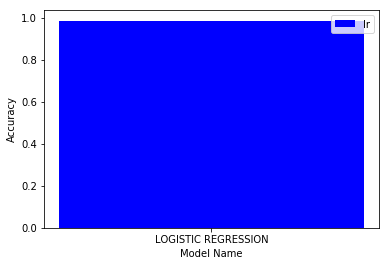

In [455]:
from sklearn.metrics import accuracy_score
lraccc=accuracy_score(y_test,Y_pred)
print(lraccc)
from sklearn.metrics import accuracy_score
lraccc=accuracy_score(y_test,Y_pred)

plt.bar(['LOGISTIC REGRESSION'],[lraccc], label="lr", color='b')

plt.legend()
plt.xlabel('Model Name')
plt.ylabel('Accuracy')
plt.show()

In [456]:

class KNearestNeighbors() :
    def __init__( self, A ) :
        self.A = A
        
    def fit( self, X_train, Y_train ) : 
        self.X_train = X_train 
        self.Y_train = Y_train
        self.m, self.n = X_train.shape
        
    def euclidean( self, x, x_train ) : 
        return np.sqrt( np.sum( np.square( x - x_train ) ) ) 
    
    def Neighbors( self, x ) : 
        euclidean_distances = np.zeros( self.m ) 
        for i in range( self.m ) : 
            d = self.euclidean( x, self.X_train[i] ) 
            euclidean_distances[i] = d 
        inds = euclidean_distances.argsort() 
        Y_train_sorted = self.Y_train[inds] 
        return Y_train_sorted[:self.A] 
   
        
    def predict( self, X_test ) : 
        self.X_test = X_test 
        self.m_test, self.n = X_test.shape 
        Y_predict = np.zeros( self.m_test ) 
        for i in range( self.m_test ) : 
            x = self.X_test[i] 
            neighbors = np.zeros( self.A ) 
            neighbors = self.Neighbors( x ) 
            Y_predict[i] = mode( neighbors )[0][0]	 
        return Y_predict 

    


In [457]:
df1=df
print(df1.shape[1])          
  
df1.columns = range(df1.shape[1])


26


In [458]:
X = df1[df1.columns[0:25]]
y = df1[df1.columns[25]]

In [459]:
X_train, X_test, y_train, y_test =train_test_split( X, y, test_size =1/3 ,random_state=0) 
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [460]:
kmodel = KNearestNeighbors( A = 9 ) 
kmodel.fit( X_train, y_train ) 


In [461]:
Y_pred = kmodel.predict(X_test)

In [462]:
cm = confusion_matrix(y_test,Y_pred)
print('\n'.join([''.join(['{:4}'.format(item) for item in row]) for row in cm]))

  52   0
   3  79


In [463]:
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
print('False Positives\n {}'.format(FP))
print('False Negetives\n {}'.format(FN))
print('True Positives\n {}'.format(TP))
print('True Negetives\n {}'.format(TN))

False Positives
 [3 0]
False Negetives
 [0 3]
True Positives
 [52 79]
True Negetives
 [79 52]


In [464]:
TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
print('Specificity \n {}'.format(TNR))
Precision = TP/(TP+FP)
print('Precision \n {}'.format(Precision))
Recall = TP/(TP+FN)
print('Recall \n {}'.format(Recall))
Accknn = (TP+TN)/(TP+TN+FP+FN)
print('Áccuracy \n{}'.format(Accknn))
Fscore = 2*(Precision*Recall)/(Precision+Recall)
print('FScore \n{}'.format(Fscore))

Specificity 
 [0.96341463 1.        ]
Precision 
 [0.94545455 1.        ]
Recall 
 [1.         0.96341463]
Áccuracy 
[0.97761194 0.97761194]
FScore 
[0.97196262 0.98136646]


In [465]:
cm = confusion_matrix(y_test,Y_pred)
print('\n'.join([''.join(['{:4}'.format(item) for item in row]) for row in cm]))

  52   0
   3  79


In [466]:
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
print('False Positives\n {}'.format(FP))
print('False Negetives\n {}'.format(FN))
print('True Positives\n {}'.format(TP))
print('True Negetives\n {}'.format(TN))

False Positives
 [3 0]
False Negetives
 [0 3]
True Positives
 [52 79]
True Negetives
 [79 52]


In [467]:
TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
print('Specificity \n {}'.format(TNR))
Precision = TP/(TP+FP)
print('Precision \n {}'.format(Precision))
Recall = TP/(TP+FN)
print('Recall \n {}'.format(Recall))
Accknn = (TP+TN)/(TP+TN+FP+FN)
print('Áccuracy \n{}'.format(Accknn))
Fscore = 2*(Precision*Recall)/(Precision+Recall)
print('FScore \n{}'.format(Fscore))

Specificity 
 [0.96341463 1.        ]
Precision 
 [0.94545455 1.        ]
Recall 
 [1.         0.96341463]
Áccuracy 
[0.97761194 0.97761194]
FScore 
[0.97196262 0.98136646]


0.9776119402985075


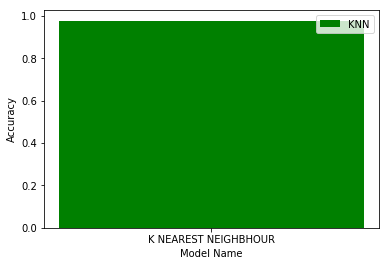

In [468]:
from sklearn.metrics import accuracy_score
lraccc=accuracy_score(y_test,Y_pred)
print(lraccc)
from sklearn.metrics import accuracy_score
lraccc=accuracy_score(y_test,Y_pred)

plt.bar(['K NEAREST NEIGHBHOUR'],[lraccc], label="KNN", color='g')

plt.legend()
plt.xlabel('Model Name')
plt.ylabel('Accuracy')
plt.show()

In [469]:
#Feature Scaling
x_scaler = MinMaxScaler()
x_scaler.fit(X)
column_names = X.columns
X[column_names] = x_scaler.transform(X)

/home/aditya1234/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/aditya1234/.local/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [470]:
#Split the data into 70% training and 30% testing 
X_train,  X_test, y_train, y_test = train_test_split( X, y, test_size=1/3,random_state=42)

In [481]:
#Build The model

Annmodel = Sequential()
Annmodel.add(Dense(256, input_dim=len(X.columns),kernel_initializer=k.initializers.random_normal(seed=13), activation="relu"))
Annmodel.add(Dense(1, activation="hard_sigmoid"))

In [482]:
Annmodel.compile(loss='binary_crossentropy', 
                  optimizer='adam', metrics=['accuracy'])

In [483]:
#Train the model
history = Annmodel.fit(X_train, y_train, epochs=2000, batch_size=X_train.shape[0]) 

Epoch 1/2000
266/266 [==============================] - 1s 5ms/step - loss: 0.6937 - acc: 0.4436
Epoch 2/2000
266/266 [==============================] - 0s 11us/step - loss: 0.6774 - acc: 0.5677
Epoch 3/2000
266/266 [==============================] - 0s 14us/step - loss: 0.6639 - acc: 0.6692
Epoch 4/2000
266/266 [==============================] - 0s 12us/step - loss: 0.6499 - acc: 0.8346
Epoch 5/2000
266/266 [==============================] - 0s 12us/step - loss: 0.6359 - acc: 0.9248
Epoch 6/2000
266/266 [==============================] - 0s 13us/step - loss: 0.6214 - acc: 0.9812
Epoch 7/2000
266/266 [==============================] - 0s 15us/step - loss: 0.6077 - acc: 0.9774
Epoch 8/2000
266/266 [==============================] - 0s 12us/step - loss: 0.5941 - acc: 0.9774
Epoch 9/2000
266/266 [==============================] - 0s 11us/step - loss: 0.5804 - acc: 0.9737
Epoch 10/2000
266/266 [==============================] - 0s 13us/step - loss: 0.5670 - acc: 0.9699
Epoch 11/2000
266/26

Epoch 84/2000
266/266 [==============================] - 0s 14us/step - loss: 0.0659 - acc: 0.9699
Epoch 85/2000
266/266 [==============================] - 0s 20us/step - loss: 0.0645 - acc: 0.9699
Epoch 86/2000
266/266 [==============================] - 0s 18us/step - loss: 0.0633 - acc: 0.9699
Epoch 87/2000
266/266 [==============================] - 0s 17us/step - loss: 0.0620 - acc: 0.9699
Epoch 88/2000
266/266 [==============================] - 0s 14us/step - loss: 0.0608 - acc: 0.9699
Epoch 89/2000
266/266 [==============================] - 0s 14us/step - loss: 0.0596 - acc: 0.9699
Epoch 90/2000
266/266 [==============================] - 0s 13us/step - loss: 0.0584 - acc: 0.9774
Epoch 91/2000
266/266 [==============================] - 0s 10us/step - loss: 0.0573 - acc: 0.9774
Epoch 92/2000
266/266 [==============================] - 0s 18us/step - loss: 0.0562 - acc: 0.9774
Epoch 93/2000
266/266 [==============================] - 0s 12us/step - loss: 0.0552 - acc: 0.9774
Epoch 94/2

266/266 [==============================] - 0s 17us/step - loss: 0.0231 - acc: 0.9962
Epoch 167/2000
266/266 [==============================] - 0s 23us/step - loss: 0.0229 - acc: 0.9962
Epoch 168/2000
266/266 [==============================] - 0s 14us/step - loss: 0.0226 - acc: 0.9962
Epoch 169/2000
266/266 [==============================] - 0s 14us/step - loss: 0.0224 - acc: 0.9962
Epoch 170/2000
266/266 [==============================] - 0s 16us/step - loss: 0.0222 - acc: 0.9962
Epoch 171/2000
266/266 [==============================] - 0s 11us/step - loss: 0.0220 - acc: 0.9962
Epoch 172/2000
266/266 [==============================] - 0s 13us/step - loss: 0.0218 - acc: 0.9962
Epoch 173/2000
266/266 [==============================] - 0s 14us/step - loss: 0.0216 - acc: 0.9962
Epoch 174/2000
266/266 [==============================] - 0s 12us/step - loss: 0.0214 - acc: 0.9962
Epoch 175/2000
266/266 [==============================] - 0s 13us/step - loss: 0.0212 - acc: 0.9962
Epoch 176/2000


266/266 [==============================] - 0s 32us/step - loss: 0.0107 - acc: 1.0000
Epoch 249/2000
266/266 [==============================] - 0s 14us/step - loss: 0.0106 - acc: 1.0000
Epoch 250/2000
266/266 [==============================] - 0s 12us/step - loss: 0.0105 - acc: 1.0000
Epoch 251/2000
266/266 [==============================] - 0s 21us/step - loss: 0.0104 - acc: 1.0000
Epoch 252/2000
266/266 [==============================] - 0s 11us/step - loss: 0.0103 - acc: 1.0000
Epoch 253/2000
266/266 [==============================] - 0s 11us/step - loss: 0.0102 - acc: 1.0000
Epoch 254/2000
266/266 [==============================] - 0s 12us/step - loss: 0.0101 - acc: 1.0000
Epoch 255/2000
266/266 [==============================] - 0s 12us/step - loss: 0.0100 - acc: 1.0000
Epoch 256/2000
266/266 [==============================] - 0s 11us/step - loss: 0.0099 - acc: 1.0000
Epoch 257/2000
266/266 [==============================] - 0s 14us/step - loss: 0.0098 - acc: 1.0000
Epoch 258/2000


266/266 [==============================] - 0s 15us/step - loss: 0.0040 - acc: 1.0000
Epoch 331/2000
266/266 [==============================] - 0s 16us/step - loss: 0.0039 - acc: 1.0000
Epoch 332/2000
266/266 [==============================] - 0s 21us/step - loss: 0.0038 - acc: 1.0000
Epoch 333/2000
266/266 [==============================] - 0s 14us/step - loss: 0.0038 - acc: 1.0000
Epoch 334/2000
266/266 [==============================] - 0s 24us/step - loss: 0.0037 - acc: 1.0000
Epoch 335/2000
266/266 [==============================] - 0s 21us/step - loss: 0.0037 - acc: 1.0000
Epoch 336/2000
266/266 [==============================] - 0s 13us/step - loss: 0.0036 - acc: 1.0000
Epoch 337/2000
266/266 [==============================] - 0s 21us/step - loss: 0.0036 - acc: 1.0000
Epoch 338/2000
266/266 [==============================] - 0s 17us/step - loss: 0.0036 - acc: 1.0000
Epoch 339/2000
266/266 [==============================] - 0s 22us/step - loss: 0.0035 - acc: 1.0000
Epoch 340/2000


266/266 [==============================] - 0s 27us/step - loss: 0.0013 - acc: 1.0000
Epoch 413/2000
266/266 [==============================] - 0s 16us/step - loss: 0.0013 - acc: 1.0000
Epoch 414/2000
266/266 [==============================] - 0s 14us/step - loss: 0.0012 - acc: 1.0000
Epoch 415/2000
266/266 [==============================] - 0s 22us/step - loss: 0.0012 - acc: 1.0000
Epoch 416/2000
266/266 [==============================] - 0s 11us/step - loss: 0.0012 - acc: 1.0000
Epoch 417/2000
266/266 [==============================] - 0s 12us/step - loss: 0.0012 - acc: 1.0000
Epoch 418/2000
266/266 [==============================] - 0s 12us/step - loss: 0.0012 - acc: 1.0000
Epoch 419/2000
266/266 [==============================] - 0s 53us/step - loss: 0.0011 - acc: 1.0000
Epoch 420/2000
266/266 [==============================] - 0s 16us/step - loss: 0.0011 - acc: 1.0000
Epoch 421/2000
266/266 [==============================] - 0s 13us/step - loss: 0.0011 - acc: 1.0000
Epoch 422/2000


Epoch 492/2000
266/266 [==============================] - 0s 34us/step - loss: 3.9418e-04 - acc: 1.0000
Epoch 493/2000
266/266 [==============================] - 0s 46us/step - loss: 3.7955e-04 - acc: 1.0000
Epoch 494/2000
266/266 [==============================] - 0s 11us/step - loss: 3.6953e-04 - acc: 1.0000
Epoch 495/2000
266/266 [==============================] - 0s 24us/step - loss: 3.6890e-04 - acc: 1.0000
Epoch 496/2000
266/266 [==============================] - 0s 24us/step - loss: 3.5428e-04 - acc: 1.0000
Epoch 497/2000
266/266 [==============================] - 0s 12us/step - loss: 3.4836e-04 - acc: 1.0000
Epoch 498/2000
266/266 [==============================] - 0s 20us/step - loss: 3.4410e-04 - acc: 1.0000
Epoch 499/2000
266/266 [==============================] - 0s 16us/step - loss: 3.3418e-04 - acc: 1.0000
Epoch 500/2000
266/266 [==============================] - 0s 20us/step - loss: 3.2660e-04 - acc: 1.0000
Epoch 501/2000
266/266 [==============================] - 0s 33u

Epoch 571/2000
266/266 [==============================] - 0s 16us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 572/2000
266/266 [==============================] - 0s 16us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 573/2000
266/266 [==============================] - 0s 16us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 574/2000
266/266 [==============================] - 0s 14us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 575/2000
266/266 [==============================] - 0s 15us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 576/2000
266/266 [==============================] - 0s 13us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 577/2000
266/266 [==============================] - 0s 21us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 578/2000
266/266 [==============================] - 0s 21us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 579/2000
266/266 [==============================] - 0s 24us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 580/2000
266/266 [==============================] - 0s 13u

Epoch 650/2000
266/266 [==============================] - 0s 11us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 651/2000
266/266 [==============================] - 0s 12us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 652/2000
266/266 [==============================] - 0s 15us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 653/2000
266/266 [==============================] - 0s 12us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 654/2000
266/266 [==============================] - 0s 14us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 655/2000
266/266 [==============================] - 0s 12us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 656/2000
266/266 [==============================] - 0s 10us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 657/2000
266/266 [==============================] - 0s 11us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 658/2000
266/266 [==============================] - 0s 14us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 659/2000
266/266 [==============================] - 0s 10u

Epoch 729/2000
266/266 [==============================] - 0s 18us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 730/2000
266/266 [==============================] - 0s 16us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 731/2000
266/266 [==============================] - 0s 14us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 732/2000
266/266 [==============================] - 0s 31us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 733/2000
266/266 [==============================] - 0s 17us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 734/2000
266/266 [==============================] - 0s 19us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 735/2000
266/266 [==============================] - 0s 15us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 736/2000
266/266 [==============================] - 0s 13us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 737/2000
266/266 [==============================] - 0s 19us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 738/2000
266/266 [==============================] - 0s 19u

Epoch 808/2000
266/266 [==============================] - 0s 15us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 809/2000
266/266 [==============================] - 0s 34us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 810/2000
266/266 [==============================] - 0s 16us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 811/2000
266/266 [==============================] - 0s 20us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 812/2000
266/266 [==============================] - 0s 16us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 813/2000
266/266 [==============================] - 0s 16us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 814/2000
266/266 [==============================] - 0s 23us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 815/2000
266/266 [==============================] - 0s 15us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 816/2000
266/266 [==============================] - 0s 12us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 817/2000
266/266 [==============================] - 0s 20u

Epoch 887/2000
266/266 [==============================] - 0s 12us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 888/2000
266/266 [==============================] - 0s 20us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 889/2000
266/266 [==============================] - 0s 16us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 890/2000
266/266 [==============================] - 0s 27us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 891/2000
266/266 [==============================] - 0s 11us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 892/2000
266/266 [==============================] - 0s 10us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 893/2000
266/266 [==============================] - 0s 27us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 894/2000
266/266 [==============================] - 0s 18us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 895/2000
266/266 [==============================] - 0s 16us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 896/2000
266/266 [==============================] - 0s 17u

Epoch 966/2000
266/266 [==============================] - 0s 11us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 967/2000
266/266 [==============================] - 0s 18us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 968/2000
266/266 [==============================] - 0s 13us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 969/2000
266/266 [==============================] - 0s 18us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 970/2000
266/266 [==============================] - 0s 20us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 971/2000
266/266 [==============================] - 0s 13us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 972/2000
266/266 [==============================] - 0s 15us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 973/2000
266/266 [==============================] - 0s 14us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 974/2000
266/266 [==============================] - 0s 12us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 975/2000
266/266 [==============================] - 0s 13u

Epoch 1045/2000
266/266 [==============================] - 0s 14us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1046/2000
266/266 [==============================] - 0s 24us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1047/2000
266/266 [==============================] - 0s 12us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1048/2000
266/266 [==============================] - 0s 12us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1049/2000
266/266 [==============================] - 0s 19us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1050/2000
266/266 [==============================] - 0s 16us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1051/2000
266/266 [==============================] - 0s 19us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1052/2000
266/266 [==============================] - 0s 24us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1053/2000
266/266 [==============================] - 0s 19us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1054/2000
266/266 [==============================

266/266 [==============================] - 0s 32us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1124/2000
266/266 [==============================] - 0s 17us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1125/2000
266/266 [==============================] - 0s 17us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1126/2000
266/266 [==============================] - 0s 15us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1127/2000
266/266 [==============================] - 0s 15us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1128/2000
266/266 [==============================] - 0s 25us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1129/2000
266/266 [==============================] - 0s 17us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1130/2000
266/266 [==============================] - 0s 18us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1131/2000
266/266 [==============================] - 0s 19us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1132/2000
266/266 [==============================] - 0s 28us/step

Epoch 1202/2000
266/266 [==============================] - 0s 15us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1203/2000
266/266 [==============================] - 0s 25us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1204/2000
266/266 [==============================] - 0s 15us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1205/2000
266/266 [==============================] - 0s 32us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1206/2000
266/266 [==============================] - 0s 16us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1207/2000
266/266 [==============================] - 0s 14us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1208/2000
266/266 [==============================] - 0s 29us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1209/2000
266/266 [==============================] - 0s 13us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1210/2000
266/266 [==============================] - 0s 16us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1211/2000
266/266 [==============================

266/266 [==============================] - 0s 14us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1281/2000
266/266 [==============================] - 0s 13us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1282/2000
266/266 [==============================] - 0s 16us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1283/2000
266/266 [==============================] - 0s 13us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1284/2000
266/266 [==============================] - 0s 11us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1285/2000
266/266 [==============================] - 0s 9us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1286/2000
266/266 [==============================] - 0s 13us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1287/2000
266/266 [==============================] - 0s 13us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1288/2000
266/266 [==============================] - 0s 11us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1289/2000
266/266 [==============================] - 0s 17us/step 

Epoch 1359/2000
266/266 [==============================] - 0s 10us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1360/2000
266/266 [==============================] - 0s 12us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1361/2000
266/266 [==============================] - 0s 13us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1362/2000
266/266 [==============================] - 0s 16us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1363/2000
266/266 [==============================] - 0s 15us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1364/2000
266/266 [==============================] - 0s 19us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1365/2000
266/266 [==============================] - 0s 11us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1366/2000
266/266 [==============================] - 0s 14us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1367/2000
266/266 [==============================] - 0s 11us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1368/2000
266/266 [==============================

266/266 [==============================] - 0s 16us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1438/2000
266/266 [==============================] - 0s 21us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1439/2000
266/266 [==============================] - 0s 20us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1440/2000
266/266 [==============================] - 0s 19us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1441/2000
266/266 [==============================] - 0s 18us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1442/2000
266/266 [==============================] - 0s 25us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1443/2000
266/266 [==============================] - 0s 18us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1444/2000
266/266 [==============================] - 0s 12us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1445/2000
266/266 [==============================] - 0s 19us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1446/2000
266/266 [==============================] - 0s 13us/step

Epoch 1516/2000
266/266 [==============================] - 0s 21us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1517/2000
266/266 [==============================] - 0s 13us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1518/2000
266/266 [==============================] - 0s 14us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1519/2000
266/266 [==============================] - 0s 21us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1520/2000
266/266 [==============================] - 0s 13us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1521/2000
266/266 [==============================] - 0s 14us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1522/2000
266/266 [==============================] - 0s 13us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1523/2000
266/266 [==============================] - 0s 17us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1524/2000
266/266 [==============================] - 0s 10us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1525/2000
266/266 [==============================

266/266 [==============================] - 0s 26us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1595/2000
266/266 [==============================] - 0s 43us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1596/2000
266/266 [==============================] - 0s 17us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1597/2000
266/266 [==============================] - 0s 14us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1598/2000
266/266 [==============================] - 0s 30us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1599/2000
266/266 [==============================] - 0s 17us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1600/2000
266/266 [==============================] - 0s 12us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1601/2000
266/266 [==============================] - 0s 16us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1602/2000
266/266 [==============================] - 0s 14us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1603/2000
266/266 [==============================] - 0s 14us/step

Epoch 1673/2000
266/266 [==============================] - 0s 26us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1674/2000
266/266 [==============================] - 0s 12us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1675/2000
266/266 [==============================] - 0s 13us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1676/2000
266/266 [==============================] - 0s 20us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1677/2000
266/266 [==============================] - 0s 11us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1678/2000
266/266 [==============================] - 0s 27us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1679/2000
266/266 [==============================] - 0s 15us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1680/2000
266/266 [==============================] - 0s 25us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1681/2000
266/266 [==============================] - 0s 15us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1682/2000
266/266 [==============================

266/266 [==============================] - 0s 26us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1752/2000
266/266 [==============================] - 0s 27us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1753/2000
266/266 [==============================] - 0s 26us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1754/2000
266/266 [==============================] - 0s 16us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1755/2000
266/266 [==============================] - 0s 18us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1756/2000
266/266 [==============================] - 0s 12us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1757/2000
266/266 [==============================] - 0s 18us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1758/2000
266/266 [==============================] - 0s 16us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1759/2000
266/266 [==============================] - 0s 15us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1760/2000
266/266 [==============================] - 0s 17us/step

Epoch 1830/2000
266/266 [==============================] - 0s 30us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1831/2000
266/266 [==============================] - 0s 15us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1832/2000
266/266 [==============================] - 0s 30us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1833/2000
266/266 [==============================] - 0s 15us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1834/2000
266/266 [==============================] - 0s 12us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1835/2000
266/266 [==============================] - 0s 19us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1836/2000
266/266 [==============================] - 0s 17us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1837/2000
266/266 [==============================] - 0s 11us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1838/2000
266/266 [==============================] - 0s 14us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1839/2000
266/266 [==============================

266/266 [==============================] - 0s 13us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1909/2000
266/266 [==============================] - 0s 24us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1910/2000
266/266 [==============================] - 0s 11us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1911/2000
266/266 [==============================] - 0s 19us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1912/2000
266/266 [==============================] - 0s 19us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1913/2000
266/266 [==============================] - 0s 14us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1914/2000
266/266 [==============================] - 0s 22us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1915/2000
266/266 [==============================] - 0s 23us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1916/2000
266/266 [==============================] - 0s 26us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1917/2000
266/266 [==============================] - 0s 10us/step

Epoch 1987/2000
266/266 [==============================] - 0s 16us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1988/2000
266/266 [==============================] - 0s 22us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1989/2000
266/266 [==============================] - 0s 13us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1990/2000
266/266 [==============================] - 0s 26us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1991/2000
266/266 [==============================] - 0s 12us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1992/2000
266/266 [==============================] - 0s 23us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1993/2000
266/266 [==============================] - 0s 14us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1994/2000
266/266 [==============================] - 0s 12us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1995/2000
266/266 [==============================] - 0s 12us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 1996/2000
266/266 [==============================

In [484]:

for model_file in glob.glob("*.model"):
  print("Model file: ", model_file)
  model = load_model(model_file)
  y_pred = Annmodel.predict(X_test)
  y_pred = [1 if y>=0.5 else 0 for y in pred] #Threshold, transforming probabilities to either 0 or 1 depending if the probability is below or above 0.5


Model file:  ckd.model


In [485]:
cm = confusion_matrix(y_test,y_pred)
print('\n'.join([''.join(['{:4}'.format(item) for item in row]) for row in cm]))

  49   0
   0  85


In [486]:
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
print('False Positives\n {}'.format(FP))
print('False Negetives\n {}'.format(FN))
print('True Positives\n {}'.format(TP))
print('True Negetives\n {}'.format(TN))

False Positives
 [0 0]
False Negetives
 [0 0]
True Positives
 [49 85]
True Negetives
 [85 49]


In [490]:
TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
print('Specificity \n {}'.format(TNR))
Precision = TP/(TP+FP)
print('Precision \n {}'.format(Precision))
Recall = TP/(TP+FN)
print('Recall \n {}'.format(Recall))
Accann = (TP+TN)/(TP+TN+FP+FN)
print('Áccuracy \n{}'.format(Accknn))
Fscore = 2*(Precision*Recall)/(Precision+Recall)
print('FScore \n{}'.format(Fscore))

Specificity 
 [1. 1.]
Precision 
 [1. 1.]
Recall 
 [1. 1.]
Áccuracy 
[1. 1.]
FScore 
[1. 1.]


1.0


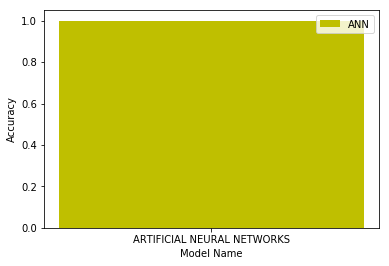

In [496]:

from sklearn.metrics import accuracy_score
Accann=accuracy_score(y_test,y_pred)
print(Accann)
plt.bar(['ARTIFICIAL NEURAL NETWORKS'],[Accann], label="ANN", color='y')

plt.legend()
plt.xlabel('Model Name')
plt.ylabel('Accuracy')
plt.show()